# Dropsondes 

 Vertical profiles of :
- Temperature
- Pressure
- Relative humidity
- Horizontal Winds

## EUREC$^4$A Sampling Coverage

| Platform  | Sondes   | Circles        |
| --------- | -------- | -------------- |
| HALO      | 895      | 71 (+1 clover) |
| P3        | 320      | 14             |
| **Total** | **1215** | **85**         |


--------
# Flying in circles - estimating divergence and vorticity
--------
-----

reference: Bony & Stevens, JAS, 2019

$u$ = $u_o$ + $\partial_x \bar{u}\centerdot \Delta{x}$ + $\partial_y \bar{u}\centerdot \Delta{y}$

$v$ = $v_o$ + $\partial_x \bar{v}\centerdot \Delta{x}$ + $\partial_y \bar{v}\centerdot \Delta{y}$

_here,_ <br/>
_$u$ and $v$ are instantaneous, local velocities, along the sonde's path_  <br/>
_$u_o$ and $v_o$ are the mean u- and v-wind velocities over the area_  <br/>
_$\Delta{x}$ and $\Delta{y}$ are the the x- and y-distances from center of circle to location of sonde_ 

- Rearranging the terms in the equations above, we get: 

$\frac{u-u_o}{\Delta{y}}$ = $\partial_x \bar{u}\centerdot\frac{\Delta{x}}{\Delta{y}}$ + $\partial_y \bar{u}$

$\frac{v-v_o}{\Delta{y}}$ = $\partial_x \bar{v}\centerdot\frac{\Delta{x}}{\Delta{y}}$ + $\partial_y \bar{v}$

Thus, we now have linear equations where, if written in terms of $y = mx + c$, 

we know x and y, and by a linear least squares fit, we can estimate m and c.

Here, the slope (m) and the intercept (c) from the two equations will be 

$m_u = \partial_x \bar{u}$ ; $c_u = \partial_y \bar{u}$

$m_v = \partial_x \bar{v}$ ; $c_v = \partial_y \bar{v}$

Now, divergence ($D$) and vorticity ($\zeta$) can be estimated using the equations,

$D = m_u + c_v$

$\zeta = m_v - c_u$

# [JOANNE - The EUREC<sup>4</sup>A Dropsonde Dataset](https://doi.org/10.25326/246)

<img align="left" src="https://img.shields.io/github/v/tag/Geet-George/JOANNE?color=teal&label=LATEST%20VERSION&style=for-the-badge">

<br><br>

<img align="left" width="600" height="1200" src="../extra/Graphics/JOANNE_LOGO.png">

<br><br><br><br><br><br><br><br><br><br><br><br>
 
JOANNE is the dataset for all dropsondes launched as part of the [EUREC<sup>4</sup>A-ATOMIC campaign](https://eurec4a.eu/) held in January-February, 2020. These include the dropsondes from DLR's [HALO](https://www.halo.dlr.de/) aircraft and NOAA's [WP-3D (N43-RF)](https://www.omao.noaa.gov/learn/aircraft-operations/aircraft/lockheed-wp-3d-orion) aircraft. Find the dataset [here on AERIS](https://doi.org/10.25326/246). The DOI of the dataset (v2.0.0) is 10.25326/246. The [companion article to the dataset](https://essd.copernicus.org/articles/13/5253/2021/) provides all details and is also the reference citation for when the JOANNE dataset is used.

The acronym JOANNE stands for **J**oint dropsonde-**O**bservations of the **A**tmosphere in tropical **N**orth atla**N**tic large-scale **E**nvironments. The name is an ode to Joanne Simpson, whose contributions to tropical meteorology are fundamental to the field.

## Products 

The different products of JOANNE are listed in the table below. Click on a product to go to its directory, which contains sample data files, along with more information about the product.

| Level                        | Description                                                                                    |
| :-------: | :---------- |
| Level - 0 | The raw files of all dropsonde launches from EUREC<sup>4</sup>A                                |
| Level - 1 | Files generated from the ASPEN-processing of all the raw files in Level-0                      |
| Level - 2| Sounding files that passed additional QC tests, and exclude all soundings with no usable data  |
| Level - 3 | All sounding files in Level-2 gridded on a uniform, vertical grid, with some derived variables |
| Level - 4  | Circle products from all circles flown during EUREC<sup>4</sup>A                               |

## Structure of the Dataset

<img align="left" width="800" src="../extra/Graphics/joanne_schematic.jpg">

<!-- width="200" height="600"  -->

-----------------
# Working with the dataset
-----------------

### Imports

In [9]:
import sys
sys.path.insert(1, '..')
import warnings
from importlib import reload
import xarray as xr
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from functions import thermo as th
from functions import plotting as pf
reload(th)
reload(pf)

import metpy
import metpy.calc as mpcalc
from metpy.units import units

from pylab import shape,size

# CAUTION: suppressing warnings here is only to keep this tutorial clean; not recommended for regular use
warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')

### Opening JOANNE Level-3 via the intake catalog for EUREC4A

In [ ]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")

In [2]:
jo3 = cat.dropsondes.JOANNE['level3'].to_dask()
jo4 = cat.dropsondes.JOANNE['level4'].to_dask()

In [3]:
jo3

<xarray.Dataset>
Dimensions:            (alt: 1001, sonde_id: 1068, nv: 2)
Coordinates:
  * alt                (alt) int16 0 10 20 30 40 ... 9960 9970 9980 9990 10000
  * sonde_id           (sonde_id) object 'HALO-0119_s02' ... 'P3-0211_s43'
    launch_time        (sonde_id) datetime64[ns] ...
    interpolated_time  (sonde_id, alt) datetime64[ns] ...
    lat                (sonde_id, alt) float32 ...
    lon                (sonde_id, alt) float32 ...
Dimensions without coordinates: nv
Data variables: (12/23)
    p                  (sonde_id, alt) float32 ...
    ta                 (sonde_id, alt) float32 ...
    rh                 (sonde_id, alt) float32 ...
    wspd               (sonde_id, alt) float32 ...
    wdir               (sonde_id, alt) float32 ...
    u                  (sonde_id, alt) float32 ...
    ...                 ...
    N_gps              (sonde_id, alt) float32 ...
    m_p                (sonde_id, alt) float32 ...
    m_ta               (sonde_id, alt) float32 ...
    m_rh               (sonde_id, alt) float32 ...
    m_gps              (sonde_id, alt) float32 ...
    alt_bnds           (alt, nv) int32 ...
Attributes: (12/16)
    title:                   EUREC4A JOANNE Level-3
    doi:                     10.25326/246
    created with:            run_joanne.py doi:10.5281/zenodo.5521192
    Conventions:             CF-1.8
    campaign_id:             EUREC4A
    project_id:              JOANNE
    ...                      ...
    JOANNE_version:          2.0.0
    author:                  Geet George
    author_email:            geet.george@mpimet.mpg.de
    featureType:             trajectory
    reference:               George et al., JOANNE : Joint dropsonde Observat...
    creation_time:           2021-09-22 14:35:24.817595 UTC

In [4]:
jo4

<xarray.Dataset>
Dimensions:          (alt: 1001, sounding: 13, circle: 85)
Coordinates:
  * alt              (alt) int16 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * circle           (circle) int64 0 1 2 3 4 5 6 7 ... 77 78 79 80 81 82 83 84
    circle_lon       (circle) float32 ...
    circle_lat       (circle) float32 ...
    circle_time      (circle) datetime64[ns] ...
    segment_id       (circle) object ...
Data variables: (12/36)
    platform_id      (circle) object ...
    flight_altitude  (circle) float32 ...
    circle_diameter  (circle) float32 ...
    u                (circle, alt) float32 ...
    dudx             (circle, alt) float32 ...
    dudy             (circle, alt) float32 ...
    ...               ...
    se_dtadx         (circle, alt) float32 ...
    se_dtady         (circle, alt) float32 ...
    se_D             (circle, alt) float32 ...
    se_vor           (circle, alt) float32 ...
    se_W             (circle, alt) float32 ...
    omega            (circle, alt) float32 ...
Attributes: (12/16)
    title:                   EUREC4A JOANNE Level-4
    doi:                     10.25326/246
    created with:            run_joanne.py doi:10.5281/zenodo.5521192
    Conventions:             CF-1.8
    campaign_id:             EUREC4A
    project_id:              JOANNE
    ...                      ...
    JOANNE_version:          2.0.0
    author:                  Geet George
    author_email:            geet.george@mpimet.mpg.de
    featureType:             trajectory
    reference:               George et al., JOANNE : Joint dropsonde Observat...
    creation_time:           2021-09-22 15:58:46.773760 UTC

### Estimating potential temperature and virtual potential temperature

In [5]:
jo3['theta'] = (jo3.ta.dims,
                mpcalc.potential_temperature(
                    jo3.p.values*units.pascal,
                    jo3.ta.values*units.kelvin,).magnitude)

jo3["theta"] = jo3["theta"].assign_attrs(
    {"standard_name": "air potential temperature",
     "units": "K",})

jo3['theta_v'] = (jo3.ta.dims,
                  mpcalc.virtual_potential_temperature(
                      jo3.p.values*units.pascal,
                      jo3.ta.values*units.kelvin,
                      jo3.q.values).magnitude)

jo3["theta_v"] = jo3["theta_v"].assign_attrs(
    {"standard_name": "air virtual potential temperature",
     "units": "K",})

### Plotting mean and IQR profiles

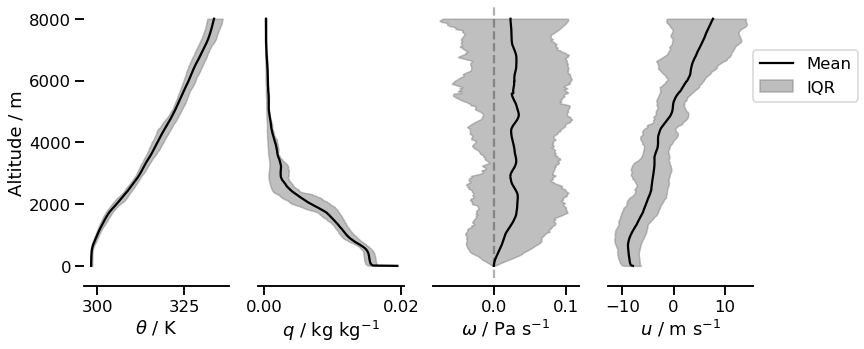

In [8]:
# selecting HALO as the platform
jo4_H = jo4.where(jo4.platform_id=='HALO')
jo3_H = jo3.where(jo3.platform_id=='HALO')

# variables to plot
var_dict = {'theta':{'ds':jo3_H,'xlabel':'$\\theta$ / K','dim':'sonde_id'},
            'q':{'ds':jo3_H,'xlabel':'$q$ / kg kg$^{-1}$','dim':'sonde_id'},
            'omega':{'ds':jo4_H,'xlabel':'$\omega$ / Pa s$^{-1}$','dim':'circle'},
#             'D':{'ds':jo4_H,'xlabel':'$\mathcal{D}$ / s$^{-1}$','dim':'circle'},
            'u':{'ds':jo4_H,'xlabel':'$u$ / m s$^{-1}$','dim':'circle'},
#             'W':{'ds':jo4_H,'xlabel':'$W$ / m s$^{-1}$','dim':'circle'}
           }

sb.set_context('talk')
f,ax = plt.subplots(1,len(var_dict),figsize=(len(var_dict)*3,5))

# setting alt limits for profile
low_alt = 0; high_alt = 8000
alt = jo4.alt.sel(alt=slice(low_alt,high_alt))

for ax_id,var in enumerate(var_dict.keys()):
    
    if 'sonde_id' in var_dict[var]['ds'].dims:
        dim='sonde_id'
    else :
        dim='circle'
    
    pf.plot_iqr_mean(var_dict[var]['ds'],var,ax[ax_id],low_alt=low_alt,high_alt=high_alt,dim=dim)
    ax[ax_id].set_xlabel(var_dict[var]['xlabel'])
    
# Beautifying the plot
ax[0].set_ylabel('Altitude / m')
ax[-1].legend(loc=(1.,0.65))

ax[2].axvline(0,linestyle='--',alpha=0.3,c='k')

for i in range(1,len(var_dict)):
    ax[i].set_ylabel('')
    ax[i].set_yticks([])
    
sb.despine(offset=8,left=True)

### More tutorials...

In the [How-To-EUREC4A notebook](https://howto.eurec4a.eu/dropsondes.html), you can learn more about using JOANNE in conjunction with the flight-phase-segmentation YAML files 

# Similar unified dataset for all dropsondes across AC$^3$?